In [1]:
# Testing Pacman
import postprocess as pp
import plots as plots


postproc


In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 

## Stability of a discrete system

In [8]:
# Run the simulation:

# !../practice/discrete-atk.py -N 2
# !../practice/discrete-atk.py -N 3

In [192]:
# Postprocessing capabilities
def _postprocess_stability(data):
    """docstring for _postprocess_stability"""
    figure, axis = plt.subplots(2, 2, figsize=(12, 9))


    # axis[0, 0].plot(X, Y1)
    _ax = axis[0, 0]
    _ax.plot(data.load, data.fracture_energy, label = 'damage')
    _ax.plot(data.load, data.elastic_energy, label = 'elastic')
    _total = data.fracture_energy + data.elastic_energy
    _ax.plot(data.load, _total, label = 'total')
    _ax.legend()
    _ax.set_xlabel('load')
    _ax.set_ylabel('Energy')

    _ax = axis[0, 1]

    _ax.plot(data.load, data.F, label = 'stress')
    _ax.legend()
    _ax.set_xlabel('load')
    _ax.set_ylabel('stress')

    _ax = axis[1, 0]

    for k in range(model_parameters["N"]+1):
        _ax.plot(data.load, [u[k] for u in data.u_t], label=f'$u_{k}$', c='C1')
    # _ax.plot(data.load, 1/_mu*data.load/2, label=f'$u^*$', ls='dotted', lw=4)

    _ax.legend()
    _ax.set_title("$u$")

    _ax2 = _ax.twinx()

    for k in range(model_parameters["N"]):
        _ax2.plot(data.load, [a[k] for a in data.alpha_t], label=f'$\\alpha_{k}$', lw=3, c='C2')

    _ax2.set_title("$\\alpha$")
    _ax2.legend(loc=4)
    _ax2.axhline(1, c='k')

    _ax = axis[1, 1]
    # params.get("loading")
    # 
    s0 = []
    
    # _dt = (params.get("loading").get("max") - params.get("loading").get("min")) /params.get("loading").get("steps")
    _dt = data.load[1]-data.load[0]

    for i, t in enumerate(data.get("load")):
        s0.append(np.trapz(data.get("rate_12_norm")[0:i], data.get("load")[0:i])/_dt)
        
    s = data.get("load") + s0

    _ax.plot(data.get("load"), s, marker = 'o', label='s')
    _ax.plot(data.get("load"), s0, marker = 'o', label='s0')
    _ax.set_title("Rate norms")
    _ax2 = _ax.twinx()
    _ax2.plot(data.get("load"), data.get("fracture_energy"), marker = 's', c='k', label='fra')
    _ax2.set_ylabel("Energies")
    _ax.legend()
    
    for _ax in axis.reshape(-1):
        _ax.axvline(_tc.subs(matpar), c='k', lw=1)

    plt.show()

def _postprocess_stability2(data):

    """docstring for _postprocess_stability"""
    figure, axis = plt.subplots(2, 2, figsize=(12, 9))
    
    _asd = np.array([step["lambda_0"] for step in data["cone_data"]])
    _lambda_0 = [np.nan if type(a) is list else a for a in _asd ]
    _stab_cnd = [0 if data["cone-stable"][i]==True else 1 for i in range(len(data))]

    _ax = axis[0, 0]
    
    for i in range(len(data.cone_data)):
        _ax.plot(data.cone_data[i]['error_x_L2'], label=f'step {i}')
    _ax.semilogy()
    # _ax.legend()
    _ax.set_xlabel('iterations')
    _ax.set_ylabel('$||\Delta x_k||_{L^2}$')

    _ax = axis[0, 1]

    _ax.scatter(data.load, _lambda_0, c=_stab_cnd, cmap='RdYlGn_r', alpha=.8)
    _ax.set_xlim([0, _k])
    _ax.set_ylim([-1, 1])
    _ax.axhline(0, c='k')

    _ax.set_title('Stability, minimum K-eigen')
    _ax.legend()
    _ax.set_xlabel('load')
    _ax.set_ylabel('$min \\sigma_K$')

    _ax = axis[1, 0]
    # [0 if x==3 for x in _asd]
    _ax.plot(data.load, _lambda_0, marker='o', ls='')
    _ax.axhline(0, c='k')
    # _ax.ylim([0, 1.])
    _ax.set_xlim([0, _k])

    _ax.axvline(_tc.subs(matpar), c='k', lw=1)
    _ax.axvline(_k, c='k', lw=1)

    _ax.set_xticks([_tc.subs(matpar), _k], ['$t_c$', '$k$'])
    _ax.fill_between(data.load, 0, 1, where=[not s for s in _stab_cnd], color='green', alpha=0.5)
    _ax.fill_between(data.load, 0, 1, where=_stab_cnd,color='red', alpha=0.5)
    _ax.set_title('Minimum eigenvalue and stability')

    _ax.legend()

    _ax = axis[1, 1]
    _ax.plot(data.load, data.F, label = 'stress')
    _ax.fill_between(data.load, 0, .1, where=_stab_cnd,color='red', alpha=0.5)
    _ax.fill_between(data.load, 0, .1, where=[not s for s in _stab_cnd], color='green', alpha=0.5)
    _ax.legend()

    _ax.axvline(_tc.subs(matpar), c='k', lw=1)
    _ax.axvline(_k, c='k', lw=1)
    _ax.axvline(_k/2, c='k', lw=1)

    _ax.set_xticks([_tc.subs(matpar), _k/2, _k], ['$t_c$', '$k/2$', '$k$'])
    _ax.set_title(f'N={_N}, k={_k}')


    for _ax in axis.reshape(-1):
        _ax.axvline(_tc.subs(matpar), c='k', lw=1)

    plt.show()




## N=2

In [216]:
# experiment = '../../practice/output/discrete-atk-N2'
experiment = '../../test/output/discrete-atk-N2'
params, data, signature = pp.load_data(experiment)
model_parameters = params.get("model")

_mu, _w1, _k, _N = model_parameters.get("mu"), model_parameters.get(
    "w1"), model_parameters.get("k"), model_parameters["N"]


In [217]:
model_parameters

{'N': 2,
 'ell': 0.1,
 'k': 4,
 'k_res': 0.0001,
 'model_dimension': 1,
 'model_type': '1D',
 'mu': 1,
 'w1': 2}

In [218]:
data;

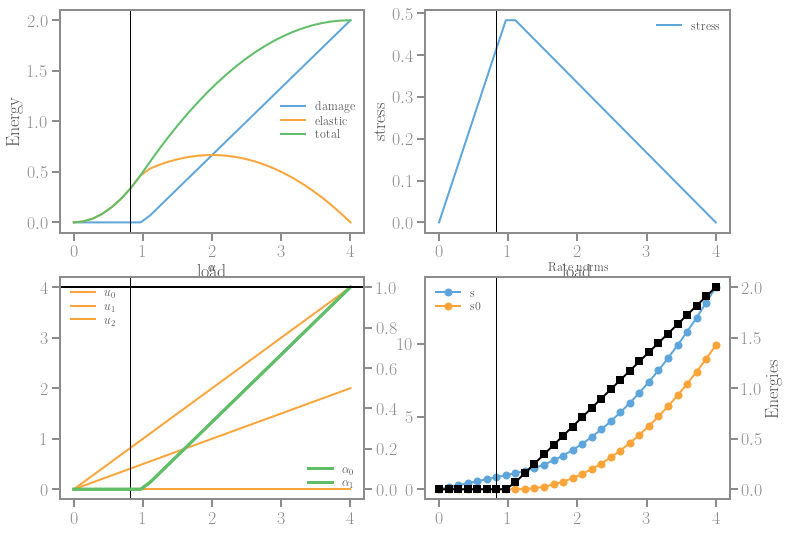

/var/folders/9t/b79vbddd6cz3hhc20g8hk86m0000gn/T/ipykernel_43826/4208226551.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _asd = np.array([step["lambda_0"] for step in data["cone_data"]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


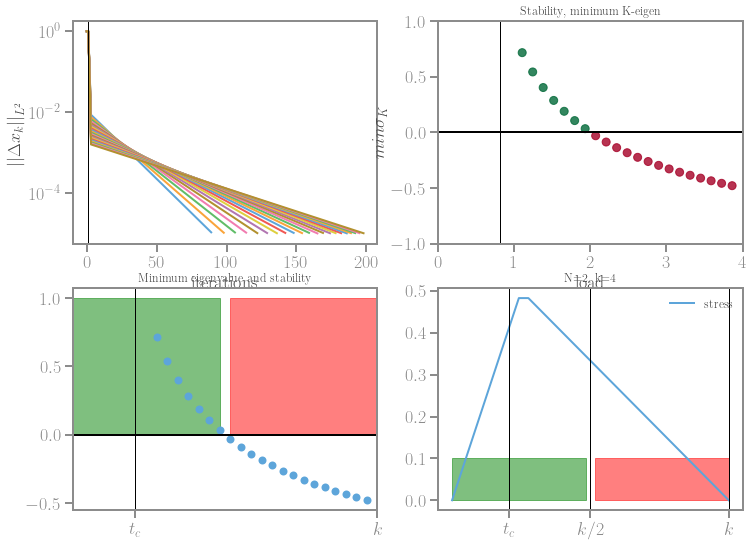

In [219]:
_postprocess_stability(data)
_postprocess_stability2(data)

$$
E(u):=\frac{1}{2} N\mu\sum_{i=1}^N a_k(\alpha_i)(u_{i}-u_{i-1})^2 + \frac{w_1}{N} \sum_{i=1}^N w(\alpha_i)
$$

$$
w(\alpha):= \alpha, \qquad a_k(\alpha):= \frac{1-\alpha}{\alpha(k-1)+1}
$$

## Analytic solution

In [12]:
## Simple Analytic 
α, α1, α2, e1, e2 = sp.symbols('α α1 α2 e1 e2')
u1, u2 = sp.symbols('u1 u2')
K1, K2 = sp.symbols('K1 K2', positive=True)
s1, s2 = sp.symbols('s1 s2', positive=True)
μ, N = sp.symbols('μ N', positive=True)
w1 = sp.symbols('w1', positive=True)
t = sp.Symbol('t', positive=True)
k = sp.Symbol('k', positive=True)

# _N = 2

K = lambda α: (1-α)/(1+(k-1)*α)
s = lambda α: 1/K(α)

U = 1/2*μ*(K1*u1**2 + K2*(t-u1)**2) * N

S = w1*(α1 + α2) / N

sol_u = sp.solve(U.diff(u1), u1)


matpar = {k: _k, w1: _w1, N: _N, μ: _mu}


In [13]:
U

0.5*N*μ*(K1*u1**2 + K2*(t - u1)**2)

In [14]:
sp.simplify(sol_u[0])

K2*t/(K1 + K2)

In [15]:
sp.simplify(sol_u[0]).subs({K1: 1/s(α), K2: 1/s(α)})

t/2

In [16]:
E=U.subs(u1, sol_u[0]).simplify()
E

0.5*K1*K2*N*t**2*μ/(K1 + K2)

In [17]:
E.subs({K1: 1/s(α), K2: 1/s(α)})

0.25*N*t**2*μ*(1 - α)/(α*(k - 1) + 1)

In [18]:
E.subs({K1: 1/s1, K2: 1/s2}).simplify()

0.5*N*t**2*μ/(s1 + s2)

In [19]:
_E = E.subs({K1: 1/s(α), K2: 1/s(α)})
_E

0.25*N*t**2*μ*(1 - α)/(α*(k - 1) + 1)

In [20]:
F = (E+S)
# .subs({K1: 1/s(α), K2: 1/s(α)}).subs({})
F = (E+S).subs({K1: 1/s(α), K2: 1/s(α), α1: α, α2: α})

F

0.25*N*t**2*μ*(1 - α)/(α*(k - 1) + 1) + 2*w1*α/N

In [21]:
Fa = F.diff(α).simplify()
Fa

-0.25*N*k*t**2*μ/(k*α - α + 1)**2 + 2*w1/N

In [22]:
Fa.subs({α: 0})

-0.25*N*k*t**2*μ + 2*w1/N

In [23]:
sp.solve(Fa, t)[1].subs({α: 0})

2.82842712474619*sqrt(w1)/(N*sqrt(k)*sqrt(μ))

In [24]:
sp.lambdify((α, t), F, 'numpy')

<function _lambdifygenerated(α, t)>

In [25]:
F

0.25*N*t**2*μ*(1 - α)/(α*(k - 1) + 1) + 2*w1*α/N

In [26]:
F.subs(matpar)

0.5*t**2*(1 - α)/(2*α + 1) + α

In [27]:
_F = sp.lambdify((α, t), F.subs(matpar), 'numpy')
_F(0, 1)

0.5

In [28]:
data.load;

### Verification

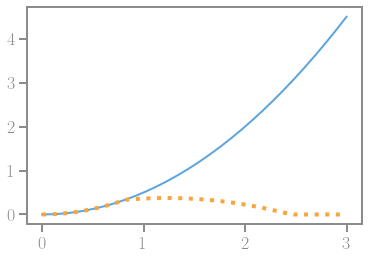

In [29]:
plt.plot(data.load, _F(0, data.load.values))
plt.plot(data.load, data.elastic_energy, ls='dotted', lw=4)

In [30]:
_tc = sp.solve(Fa, t)[1].subs({α: 0})
_tc
# __tc = _tc.subs(matpar)
# sp.N(__tc)

2.82842712474619*sqrt(w1)/(N*sqrt(k)*sqrt(μ))

In [31]:
sp.N(_tc.subs(matpar))

0.816496580927726

Text(0.5, 1.0, 'N=2, k=3')

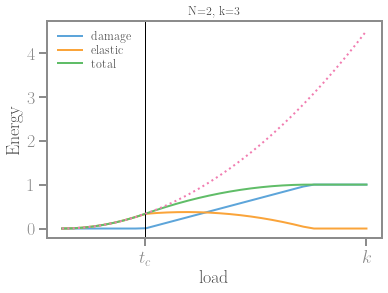

In [33]:
# params, data, signature = pp.load_data(experiment)

plt.plot(data.load, data.fracture_energy, label = 'damage')
plt.plot(data.load, data.elastic_energy, label = 'elastic')
_total = data.fracture_energy + data.elastic_energy
plt.plot(data.load, _total, label = 'total')
# plt.axvline(__tc, c='k')
plt.axvline(_tc.subs(matpar), c='k', lw=1)
plt.legend()
plt.xlabel('load')
plt.ylabel('Energy')

plt.plot(data.load, _F(0, data.load.values), ls = 'dotted')
# plt.plot(data.load, 2*Ef(0, data.load.values), ls = 'dotted')


plt.xticks([_tc.subs(matpar), _k], ['$t_c$', '$k$'])
plt.title(f'N={_N}, k={_k}')



In [215]:
data;

Text(0.5, 1.0, 'N=2, k=3')

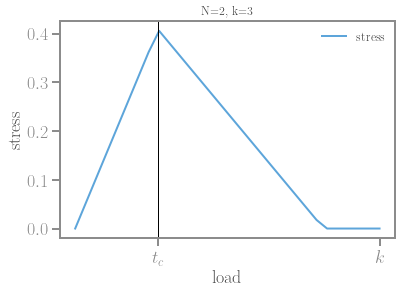

In [34]:
plt.plot(data.load, data.F, label = 'stress')
# plt.plot(data.load, data.elastic_energy, label = 'elastic')
# _total = data.fracture_energy + data.elastic_energy
# plt.plot(data.load, _total, label = 'total')
plt.legend()
plt.xlabel('load')
plt.ylabel('stress')
# plt.axhline(_σc/2, c='k')

plt.axvline(_tc.subs(matpar), c='k', lw=1)

plt.xticks([_tc.subs(matpar), _k], ['$t_c$', '$k$'])
plt.title(f'N={_N}, k={_k}')


Text(0.5, 1.0, 'N=2, k=3')

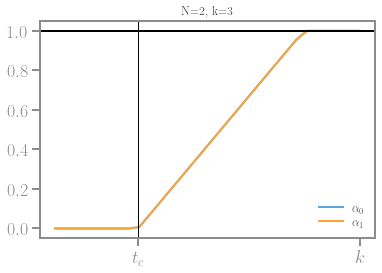

In [35]:
for k in range(model_parameters["N"]):
    plt.plot(data.load, [a[k] for a in data.alpha_t], label=f'$\\alpha_{k}$')

plt.title("$\\alpha$")
plt.legend()
plt.axhline(1, c='k')

plt.axvline(_tc.subs(matpar), c='k', lw=1)

plt.xticks([_tc.subs(matpar), _k], ['$t_c$', '$k$'])
plt.title(f'N={_N}, k={_k}')


Text(0.5, 1.0, 'N=2, k=3')

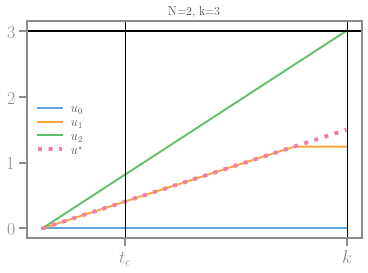

In [36]:
for k in range(model_parameters["N"]+1):
    plt.plot(data.load, [u[k] for u in data.u_t], label=f'$u_{k}$')
plt.plot(data.load, 1/_mu*data.load/2, label=f'$u^*$', ls='dotted', lw=4)

plt.legend()
plt.title("$u$")
plt.axhline(data.load.values[-1], c='k')

plt.axvline(_tc.subs(matpar), c='k', lw=1)
plt.axvline(_k, c='k', lw=1)

plt.xticks([_tc.subs(matpar), _k], ['$t_c$', '$k$'])
plt.title(f'N={_N}, k={_k}')


Text(0, 0.5, '$||\\Delta x_k||_{L^2}$')

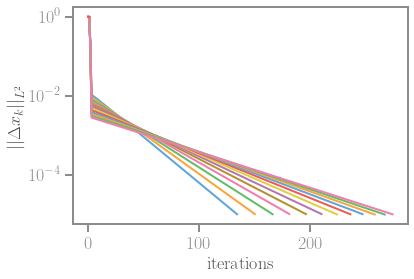

In [37]:
for i in range(len(data.cone_data)):
    plt.plot(data.cone_data[i]['error_x_L2'], label=f'step {i}')
plt.semilogy()
# plt.legend()
plt.xlabel('iterations')
plt.ylabel('$||\Delta x_k||_{L^2}$')


In [38]:
data.cone_data[3].keys()

dict_keys(['iterations', 'error_x_L2', 'lambda_k', 'lambda_0', 'y_norm_L2'])

In [67]:
_stab_cnd = [0 if data["cone-stable"][i]==True else 1 for i in range(len(data))]
_stab_cnd;

Text(0, 0.5, '$||y_k||_{L^2}$')

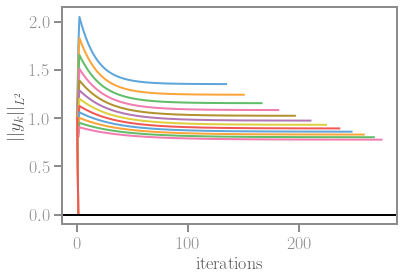

In [39]:
for i in range(len(data.cone_data)):
    plt.plot(data.cone_data[i]['y_norm_L2'], label=f'step {i}')
# plt.semilogy()
# plt.legend()
plt.axhline(0, c='k')
plt.xlabel('iterations')
plt.ylabel('$||y_k||_{L^2}$')


Text(0.5, 0, 'iterations')

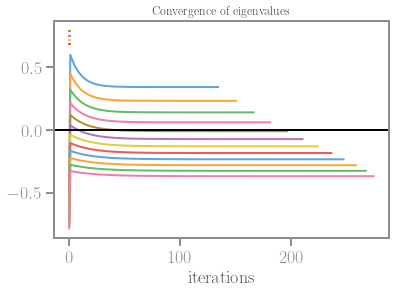

In [40]:
for i in range(len(data.cone_data)):
    plt.plot(data.cone_data[i]['lambda_k'], label=f'step {i}')
plt.axhline(0, c='k')
plt.title('Convergence of eigenvalues')
plt.xlabel('iterations')


/var/folders/9t/b79vbddd6cz3hhc20g8hk86m0000gn/T/ipykernel_43826/3995412873.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _asd = np.array([step["lambda_0"] for step in data["cone_data"]])


Text(0.5, 1.0, 'Minimum eigenvalue and stability')

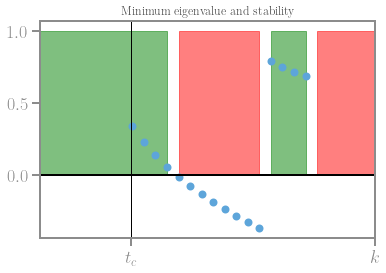

In [75]:
_asd = np.array([step["lambda_0"] for step in data["cone_data"]])
# [0 if x==3 for x in _asd]
_lambda_0 = [np.nan if type(a) is list else a for a in _asd ]
plt.plot(data.load, _lambda_0, marker='o', ls='')
plt.axhline(0, c='k')
# plt.ylim([0, 1.])
plt.xlim([0, _k])

plt.axvline(_tc.subs(matpar), c='k', lw=1)
plt.axvline(_k, c='k', lw=1)

plt.xticks([_tc.subs(matpar), _k], ['$t_c$', '$k$'])
plt.fill_between(data.load, 0, 1, where=[not s for s in _stab_cnd], color='green', alpha=0.5)
plt.fill_between(data.load, 0, 1, where=_stab_cnd,color='red', alpha=0.5)

plt.title('Minimum eigenvalue and stability')

Text(0.5, 1.0, 'Stability, minimum K-eigen')

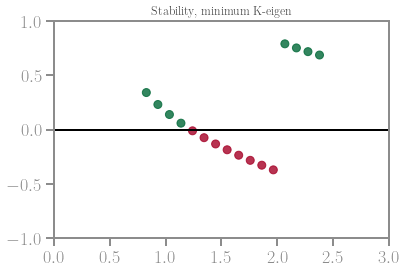

In [91]:
plt.scatter(data.load, _lambda_0, c=_stab_cnd, cmap='RdYlGn_r', alpha=.8)
plt.xlim([0, _k])
plt.ylim([-1, 1])
plt.axhline(0, c='k')

plt.title('Stability, minimum K-eigen')

In [214]:
data;

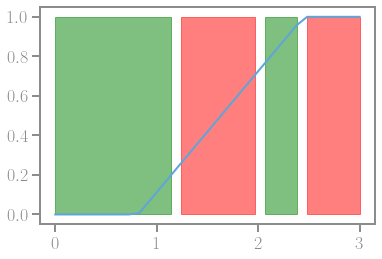

In [123]:


# plt.plot(_stab_cnd)
plt.plot(data.load, data.fracture_energy)
plt.fill_between(data.load, 0, 1, where=_stab_cnd,color='red', alpha=0.5)
plt.fill_between(data.load, 0, 1, where=[not s for s in _stab_cnd], color='green', alpha=0.5)

Text(0.5, 1.0, 'N=2, k=3')

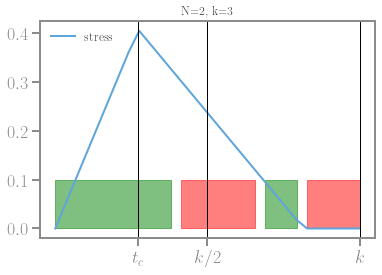

In [129]:
plt.plot(data.load, data.F, label = 'stress')
plt.fill_between(data.load, 0, .1, where=_stab_cnd,color='red', alpha=0.5)
plt.fill_between(data.load, 0, .1, where=[not s for s in _stab_cnd], color='green', alpha=0.5)
plt.legend()

plt.axvline(_tc.subs(matpar), c='k', lw=1)
plt.axvline(_k, c='k', lw=1)
plt.axvline(_k/2, c='k', lw=1)

plt.xticks([_tc.subs(matpar), _k/2, _k], ['$t_c$', '$k/2$', '$k$'])
plt.title(f'N={_N}, k={_k}')



In [88]:
[converged['iterations'] for converged in data.cone_data]
# [converged['lambda_k'] for converged in data.cone_data]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 134,
 150,
 166,
 181,
 196,
 210,
 224,
 236,
 247,
 258,
 267,
 274,
 1,
 1,
 1,
 1,
 [],
 [],
 [],
 [],
 [],
 []]

In [89]:
asd = np.array([converged['lambda_k'][-1] for converged in data.cone_data if isinstance(converged['iterations'], int)])
asd
# plt.plot(asd)

array([ 0.34113716,  0.23129344,  0.13907438,  0.0594894 , -0.01077217,
       -0.07398274, -0.13174358, -0.18520541, -0.23520715, -0.28236635,
       -0.32714041, -0.36986936,  0.78928003,  0.75169527,  0.7175273 ,
        0.68633046])

In [90]:
[converged['lambda_k'][-1] for converged in data.cone_data if len(converged['lambda_k'])>0]

[0.3411371555836197,
 0.23129344224964782,
 0.13907438470579842,
 0.059489395425055866,
 -0.010772171956834753,
 -0.07398273855966868,
 -0.1317435780675608,
 -0.18520540756690793,
 -0.2352071464717317,
 -0.2823663522505975,
 -0.3271404074606041,
 -0.3698693593850898,
 0.7892800297040861,
 0.7516952659344921,
 0.7175272990202609,
 0.6863304597535119]

## N=3

Vivo alla base, ho  srotolato solo hardcore / mi alleno co' Alien D: pronto Ensi  per i lividi / . Missione Speciale: FeasterRootsConnect. _Complete_ co' un risultato universale..:

In [204]:
experiment = '../../practice/output/discrete-atk-N3'
params, data, signature = pp.load_data(experiment)
model_parameters = params.get("model")

_mu, _w1, _k, _N = model_parameters.get("mu"), model_parameters.get(
    "w1"), model_parameters.get("k"), model_parameters["N"]

model_parameters

{'N': 3,
 'ell': 0.1,
 'k': 3,
 'k_res': 0.0001,
 'model_dimension': 1,
 'model_type': '1D',
 'mu': 1,
 'w1': 1}

In [154]:
_stab_cnd = [0 if data["cone-stable"][i]==True else 1 for i in range(len(data))]
# _stab_cnd
data["cone-stable"];
np.array([step["lambda_0"] for step in data["cone_data"]])

/var/folders/9t/b79vbddd6cz3hhc20g8hk86m0000gn/T/ipykernel_43826/4061427803.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([step["lambda_0"] for step in data["cone_data"]])


array([list([]), list([]), list([]), list([]), list([]), list([]),
       list([]), list([]), -0.00654267061874834, -0.06218171538521759,
       -0.11030463841597493, -0.15320148864483918, -0.1924148510574159,
       -0.22903182483332743, -0.26385372496857057, -0.2975022989214779,
       -0.33049195898961153, -0.36328543194171276, -0.39634376404411953,
       0.5538807231181593, 0.526186686469391, -0.7649456576486107,
       0.47835153268017383, list([]), list([]), list([]), list([]),
       list([]), list([]), list([])], dtype=object)

TypeError: 'NoneType' object is not subscriptable

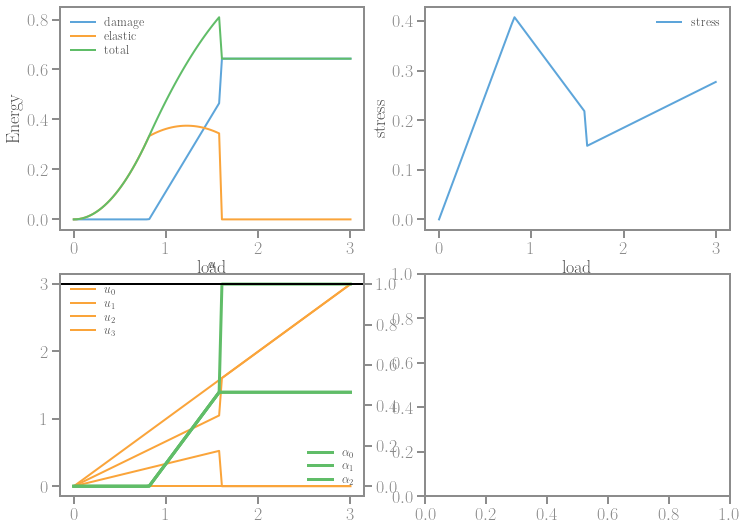

In [205]:
_postprocess_stability(data)
b

/var/folders/9t/b79vbddd6cz3hhc20g8hk86m0000gn/T/ipykernel_43826/4208226551.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _asd = np.array([step["lambda_0"] for step in data["cone_data"]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


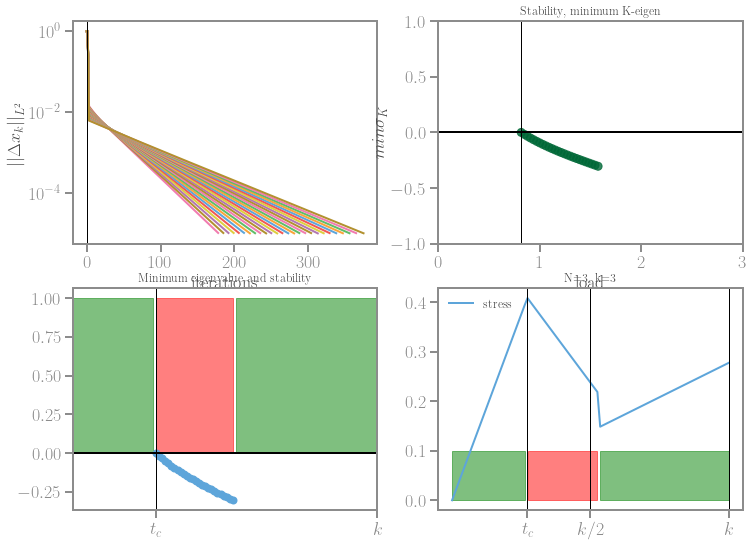

In [206]:
_postprocess_stability2(data)


## N=4

Vivo alla base, ho  srotolato solo hardcore / mi alleno co' Alien D: pronto Ensi  per i lividi / . Missione Speciale: FeasterRootsConnect. _Complete_ co' un risultato universale..:

In [212]:
experiment = '../../test/output/discrete-atk-N4'
params, data, signature = pp.load_data(experiment)
model_parameters = params.get("model")

_mu, _w1, _k, _N = model_parameters.get("mu"), model_parameters.get(
    "w1"), model_parameters.get("k"), model_parameters["N"]

model_parameters

{'N': 4,
 'ell': 0.1,
 'k': 4,
 'k_res': 0,
 'model_dimension': 1,
 'model_type': '1D',
 'mu': 1,
 'w1': 2}

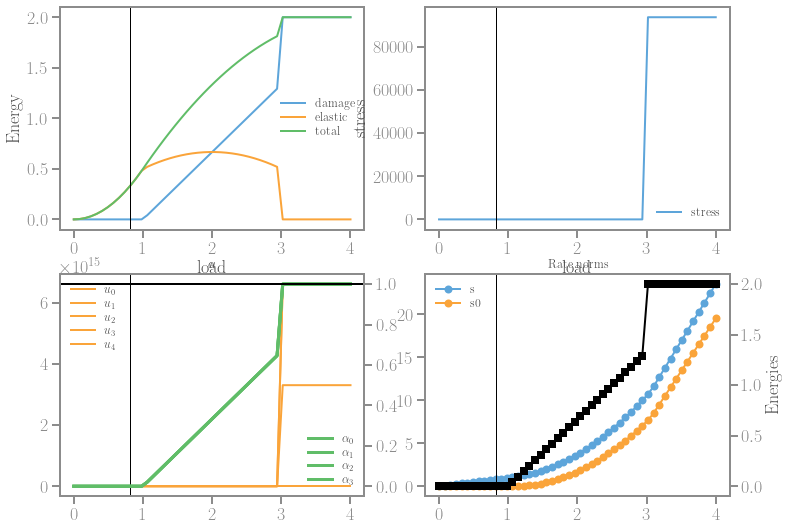

/var/folders/9t/b79vbddd6cz3hhc20g8hk86m0000gn/T/ipykernel_43826/4208226551.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _asd = np.array([step["lambda_0"] for step in data["cone_data"]])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


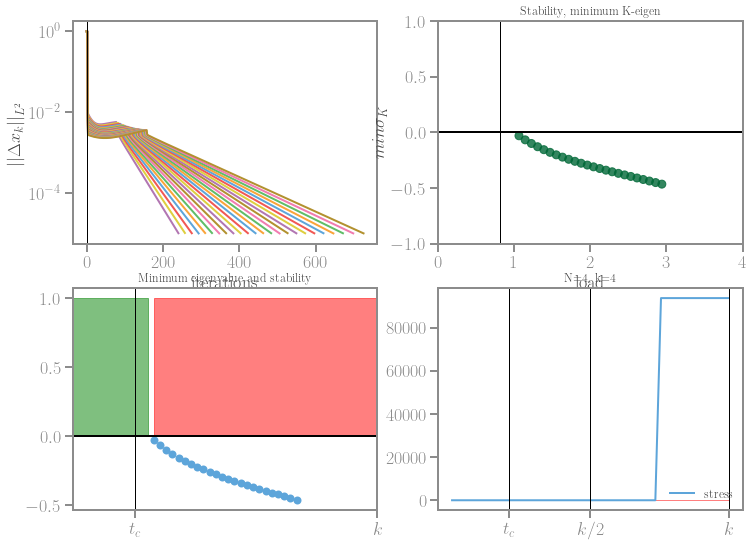

In [213]:
_postprocess_stability(data)
_postprocess_stability2(data)



## Stability of a short bar

In [ ]:
!ls ../../playground/

In [ ]:
experiment = '../../practice/output/traction_cone'
params, data, signature = pp.load_data(experiment)


In [ ]:
data.cone_data[6]

In [ ]:
[data.cone_data[i]['iterations'] for i in range(len(data.cone_data))]

$$
s:= t + \int_0^t ||\dot \alpha||_{1, 2} dx
$$

In [ ]:
data.get("rate_12_norm")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
params.get("geometry").get("Ly")

In [ ]:
sell = []
_dt = (params.get("loading").get("max") - params.get("loading").get("min")) /params.get("loading").get("steps")
for i, t in enumerate(data.get("load")):
    sell.append(np.trapz(data.get("rate_12_norm")[0:i], data.get("load")[0:i])/_dt)

s0 = []
_dt = (params.get("loading").get("max") - params.get("loading").get("min")) /params.get("loading").get("steps")
for i, t in enumerate(data.get("load")):
    s0.append(np.trapz(data.get("rate_12_norm_unscaled")[0:i], data.get("load")[0:i])/_dt)
    
# s = data.get("load") + s0

In [ ]:
plt.title("Evolution Jumps?")
# plt.plot(data.get("load"), s, marker = 'o', label='s')
plt.plot(data.get("load"), sell, marker = 'o', label='$s_\ell$')
plt.plot(data.get("load"), s0, marker = 'o', label='$s_0$')
plt.plot(data.get("load"), data.get("load"), marker = 'o', label='t')
plt.ylabel('$t, s_0, s$')
plt.xlabel('t')
plt.legend()
plt.twinx()
plt.plot(data.get("load"), data.get("fracture_energy")/params.get("geometry").get("Ly"),
    marker = 's', c='k', label='fracture')
plt.ylabel('energy')
plt.legend(loc=4)
plt.savefig('jumps_evo_multifiss.png')

In [ ]:
plt.plot(data.get("load"), sell, marker = 'o', label='$s_\ell$')
plt.twinx()
plt.plot(np.diff(np.array(sell)), label="")
plt.xlabel('t')
